# Data Preprocessing

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d budincsevity/szeged-weather

  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 126MB/s]


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import zipfile
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
with zipfile.ZipFile("szeged-weather.zip", "r") as zip_ref:
    zip_ref.extractall("data")

dt = pd.read_csv("data/weatherHistory.csv")

In [ ]:
dt.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
dt.rename(columns = {col:col.replace(' ','_') for col in dt.columns},inplace = True)
print(dt.columns)

Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature_(C)',
       'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
       'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Loud_Cover',
       'Pressure_(millibars)', 'Daily_Summary'],
      dtype='object')


In [ ]:
dt.describe()

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
dt.describe(include = 'O')

,Formatted_Date,Summary,Precip_Type,Daily_Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


In [ ]:
# Rename columns with underscores
dt.columns = [col.replace(' ', '_') for col in dt.columns]

In [ ]:
# Drop redundant column 'Loud_Cover'
dt.drop('Loud_Cover', axis=1, inplace=True)

In [ ]:
# Convert the Formatted_Date Columns datatype to Datetime.
dt['Formatted_Date']=pd.to_datetime(dt['Formatted_Date'],format='%Y-%m-%d %H:%M:%S.%f',utc=True)

# Seperate tht Formatted_Date columns to Year, Month, Day, and Hours Column
dt['Year'] = dt['Formatted_Date'].dt.year
dt['Month'] = dt['Formatted_Date'].dt.month
dt['Day'] = dt['Formatted_Date'].dt.dayofyear
dt['Hour'] = dt['Formatted_Date'].dt.hour

#Drop the Formatted_Date Columns
column_name = 'Formatted_Date'
dt.drop(column_name, axis=1, inplace=True)

# Filter the data for the years 2006 to 2009 using the 'Formatted_Date' column
weather_data = dt[(dt['Year'] >= 2006) & (dt['Year'] <= 2009)]

# Encode categorical variables
dt = pd.get_dummies(dt, columns=['Summary', 'Precip_Type', 'Daily_Summary'])

# show the first few rows of the filtered data
weather_data.head()

,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars),Daily_Summary,Year,Month,Day,Hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,90,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,90,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,91,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,91,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,91,2


In [ ]:
unique_years = weather_data['Year'].unique()

# Check if all unique years are within the range 2006 to 2009
if all(year in range(2006, 2010) for year in unique_years):
    print("All values in the 'Formatted_Date' column are from the years 2006 to 2009.")
else:
    print("Values in the 'Formatted_Date' column are not exclusively from the years 2006 to 2009.")

# show the filtered_data row and columns count.
weather_data.shape

All values in the 'Formatted_Date' column are from the years 2006 to 2009.


(35064, 14)

In [ ]:
# check if the weather_data values is null

total =weather_data.isnull().sum().sort_values(ascending = False)
percent =(weather_data.isnull().sum()/len(weather_data)).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Summary,0,0.0
Precip_Type,0,0.0
Temperature_(C),0,0.0
Apparent_Temperature_(C),0,0.0
Humidity,0,0.0
Wind_Speed_(km/h),0,0.0
Wind_Bearing_(degrees),0,0.0
Visibility_(km),0,0.0
Pressure_(millibars),0,0.0
Daily_Summary,0,0.0


# Modelling

In [ ]:
weather_data['Summary']=(weather_data['Summary'].astype('category')).cat.codes
weather_data['Daily_Summary']=(weather_data['Daily_Summary'].astype('category')).cat.codes
weather_data['Precip_Type']=(weather_data['Precip_Type'].astype('category')).cat.codes

In [ ]:
WD=weather_data
WD=WD.drop(['Humidity','Temperature_(C)','Apparent_Temperature_(C)','Summary','Precip_Type','Wind_Speed_(km/h)','Wind_Bearing_(degrees)','Visibility_(km)',
                                'Pressure_(millibars)','Daily_Summary','Month','Day','Year','Hour'],axis=1)
WD["M"]=weather_data["Month"]
WD["Y"]=weather_data["Year"]
WD["D"]=weather_data["Day"]
WD["Hour"]=weather_data["Hour"]
WD["WS"]=weather_data["Wind_Speed_(km/h)"]
WD["WB"]=weather_data["Wind_Bearing_(degrees)"]
WD["P"]=weather_data["Pressure_(millibars)"]
WD["Vis"]=weather_data["Visibility_(km)"]
WD["Sum"]=weather_data["Summary"]
WD["DataSum"]=weather_data["Daily_Summary"]
WD["PT"]=weather_data["Precip_Type"]
WD["H"]=weather_data["Humidity"]

# Temperature (C) will be the predicted data
temp=weather_data["Temperature_(C)"]

# Split data into features and target variable
X = dt.drop('Temperature_(C)', axis=1)
y = dt['Temperature_(C)']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
# Define the RNN model architecture
RNNmodel = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model
RNNmodel.compile(optimizer='adam', loss='mse')

# Train the model
history = RNNmodel.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/50
2412/2412 [==============================] - 16s 6ms/step - loss: 24.4717 - val_loss: 6.6476
Epoch 2/50
2412/2412 [==============================] - 13s 5ms/step - loss: 5.3332 - val_loss: 4.7416
Epoch 3/50
2412/2412 [==============================] - 13s 5ms/step - loss: 4.0266 - val_loss: 3.7864
Epoch 4/50
2412/2412 [==============================] - 15s 6ms/step - loss: 3.2303 - val_loss: 3.0710
Epoch 5/50
2412/2412 [==============================] - 17s 7ms/step - loss: 2.5996 - val_loss: 2.5093
Epoch 6/50
2412/2412 [==============================] - 13s 5ms/step - loss: 2.1454 - val_loss: 2.0546
Epoch 7/50
2412/2412 [==============================] - 13s 5ms/step - loss: 1.7861 - val_loss: 1.7260
Epoch 8/50
2412/2412 [==============================] - 14s 6ms/step - loss: 1.5118 - val_loss: 1.4687
Epoch 9/50
2412/2412 [==============================] - 13s 5ms/step - loss: 1.3120 - val_loss: 1.2747
Epoch 10/50
2412/2412 [==============================] - 14s 6ms/step - 

2412/2412 [==============================] - 8s 3ms/step - loss: 0.1130
Train Loss: 0.112956702709198
603/603 [==============================] - 2s 3ms/step - loss: 0.1686
Test Loss: 0.16857296228408813
603/603 [==============================] - 1s 2ms/step

Train Mean Absolute Error (MAE): 0.1593120218270512
Train Root Mean Squared Error (RMSE): 0.33609054643253455
Train R2 Score: 0.998758693328553


Test Mean Absolute Error (MAE): 0.17869918367044657
Test Root Mean Squared Error (RMSE): 0.4105763735788744
Test R2 Score: 0.9981708519492621


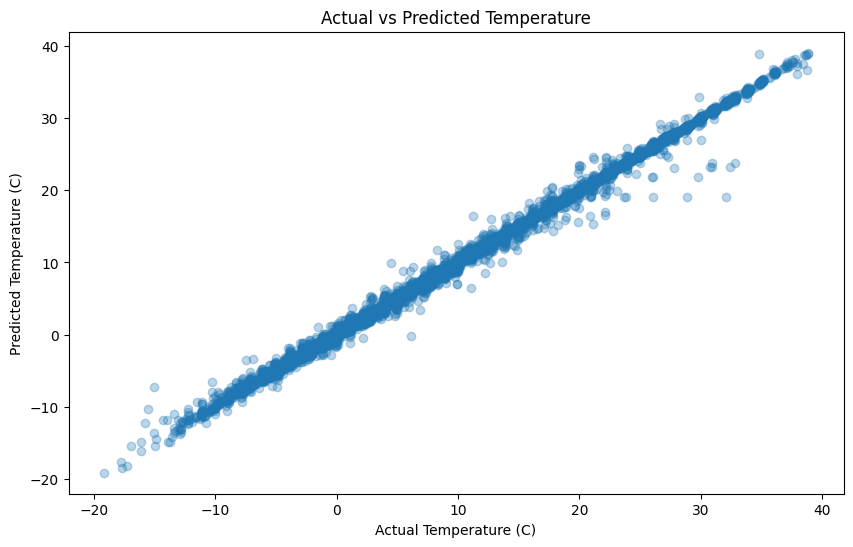

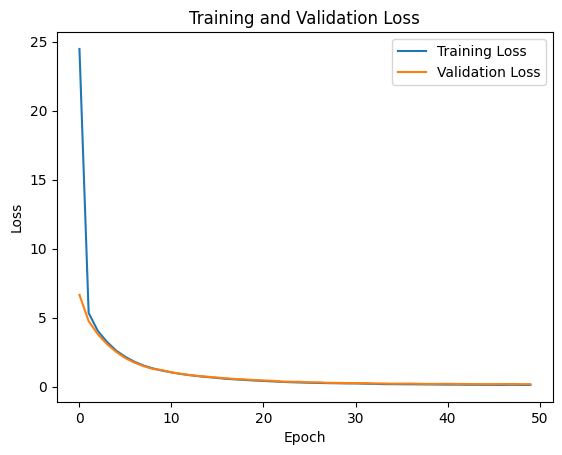

In [ ]:
# Evaluate the model
trainloss = RNNmodel.evaluate(X_train_reshaped, y_train)
print(f'Train Loss: {trainloss}')

testloss = RNNmodel.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {testloss}')

# Generate predictions
trainpredictions = RNNmodel.predict(X_train_reshaped)

testpredictions = RNNmodel.predict(X_test_reshaped)

# Calculate evaluation metrics
trainmae = mean_absolute_error(y_train, trainpredictions)
trainrmse = mean_squared_error(y_train, trainpredictions, squared=False)
trainr2 = r2_score(y_train, trainpredictions)
print("\nTrain Mean Absolute Error (MAE):", trainmae)
print("Train Root Mean Squared Error (RMSE):", trainrmse)
print("Train R2 Score:", trainr2)
print("\n"+'='*80)

testmae = mean_absolute_error(y_test, testpredictions)
testrmse = mean_squared_error(y_test, testpredictions, squared=False)
testr2 = r2_score(y_test, testpredictions)
print("\nTest Mean Absolute Error (MAE):", testmae)
print("Test Root Mean Squared Error (RMSE):", testrmse)
print("Test R2 Score:", testr2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, testpredictions, alpha=0.3)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()